## Final Project Submission
* Name: Kezia Setokusumo
* Pace: Self-Paced
* Scheduled Project Review:
* Instructor: Mark Barbour
* Blog Post

## Overview and Problem Statement
This project focuses on building a Natural Language Processing (NLP) tool as part of a classification task to analyze sentiment about products released by Apple, Google, and Android. Using machine learning models, we can assign emotion labels to thousands of tweets regarding the three companies and their respective products. Performing sentiment analysis on the Twitter dataset helps us determine whether a given tweet is positive, negative, or neutral, and our findings can be used to aid these businesses in monitoring perceptions about their brand and specific products.

## The Data
The file `tweet_data.csv` is a dataset containing tweets that contributors at a festival posted about Google, Apple, or Android products. The columns in the original spreadsheet are as follows:
* `tweet_text`: the original tweet
* `emotion_in_tweet_is_directed_at`: the product the tweet is referring to
* `is_there_an_emotion_directed_at_a_brand_or_product`: the emotion (or lack of emotion) expressed in the tweet

The column `is_there_an_emotion_directed_at_a_brand_or_product` will serve as the target variable in our analysis. The target variable's unique values are:
* Negative emotion
* Positive emotion
* No emotion toward brand or product
* I can't tell

We assign a number to each target variable value for our analysis so the data can be modeled. Through performing a process called tokenizing on the `tweet_text` column and analyzing consumer sentiment by product and company, we can deliver actionable insights to each brand so they can better understand their strengths and address pain points.

## Data Exploration, Cleaning, and Preprocessing
We start by importing the relevant libraries and passing the data into a DataFrame.

In [1]:
# import relevant libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
data = pd.read_csv('tweet_data.csv', encoding="ISO-8859-1")

A preview of the original dataset is shown below:

In [2]:
# print out the first five rows of the dataset to preview
data.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


The column names can get quite long. We'll rename them for ease of understanding.

In [3]:
# assign shorter and clearer names to the columns
data.columns = ['tweet', 'product', 'sentiment']

To kickoff the preprocessing and cleaning, we will check for any duplicates.

In [4]:
# check for duplicate tweets in the dataset
data[data.duplicated()]

,tweet,product,sentiment
468,"Before It Even Begins, Apple Wins #SXSW {link}",Apple,Positive emotion
776,Google to Launch Major New Social Network Call...,NaN,No emotion toward brand or product
2232,Marissa Mayer: Google Will Connect the Digital...,NaN,No emotion toward brand or product
2559,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion
3950,Really enjoying the changes in Gowalla 3.0 for...,Android App,Positive emotion
3962,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
4897,"Oh. My. God. The #SXSW app for iPad is pure, u...",iPad or iPhone App,Positive emotion
5338,RT @mention ÷¼ GO BEYOND BORDERS! ÷_ {link} ...,NaN,No emotion toward brand or product
5341,"RT @mention ÷¼ Happy Woman's Day! Make love, ...",NaN,No emotion toward brand or product
5881,RT @mention Google to Launch Major New Social ...,NaN,No emotion toward brand or product


As suspected, there are several rows that contain the same tweet. We'll go ahead and keep only the first row, dropping any other copies.

In [5]:
# drop any repeat rows and only keep the first one
data.drop_duplicates(keep='first', inplace=True)

# check for duplicates after dropping -- output should be 0
data.duplicated().sum()

0

Now that there are no more duplicates, we'll continue by removing any URLs from tweets. Links and pictures that are tweeted show up in our dataset as long strings that don't necessarily contribute to our sentiment analysis. Additionally, we want to ensure that the same words are not double counted. For instance, "The" and "the" should be treated as the same word. We will use regex and the lower() method to scrub the tweets accordingly.

In [6]:
# twitter allows users to include pictures or links, which show up as URLs that don't really help our analysis
# use regex to replace substrings that starts with "http"
data['tweet'] = data['tweet'].replace(r'http\S+', '', regex=True)

# set all the tweets to lower case to avoid double counting
# "The" and "the" would be treated differently without the lower() method
data['tweet'] = data['tweet'].str.lower()

We also need to check for any null entries. The info() method shows that we have 9071 rows, but some columns have far less non-null entries than 9071. To check how many invalid rows there are, we sum the number null entries and group them by column.

In [7]:
# Use the info() method to inspect the data as it is
# The output shows 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9071 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      9070 non-null   object
 1   product    3282 non-null   object
 2   sentiment  9071 non-null   object
dtypes: object(3)
memory usage: 283.5+ KB


In [8]:
# Use isna() and sum() methods to pull null values and add them
data.isna().sum()

tweet           1
product      5789
sentiment       0
dtype: int64

The `tweet` column has 1 null entry while the `product` column has 5789. If there's no tweet, then we can't really use it in our analysis. In the following two cells, we drop the row with a null `tweet` value and replace the rows containing null `product` values with "unknown".

In [9]:
# Get rid of the row that has a null tweet value
data = data[data['tweet'].isna() == False]

In [10]:
# Fill the null values in the product column with "unknown"
data['product'].fillna('unknown', inplace=True)

# Display the unique product values
data['product'].value_counts()

unknown                            5788
iPad                                945
Apple                               659
iPad or iPhone App                  469
Google                              428
iPhone                              296
Other Google product or service     293
Android App                          80
Android                              77
Other Apple product or service       35
Name: product, dtype: int64

Before proceeding, we need to check that there are no more null entries. We'll use the isna() and sum() methods again.

In [11]:
# Use isna() and sum() methods to pull null values and add them
data.isna().sum()

tweet        0
product      0
sentiment    0
dtype: int64

Now that we've gotten rid of null entries, we can now inspect the target column (which we have renamed to `sentiment`). Below is a printout of the target variable's unique values.

In [12]:
# Display the unique sentiment values
data['sentiment'].value_counts()

No emotion toward brand or product    5375
Positive emotion                      2970
Negative emotion                       569
I can't tell                           156
Name: sentiment, dtype: int64

For the purpose of our analysis, it's rather difficult to use tweets that have show ambiguous emotions. We will go ahead and filter out the rows that are marked "I can't tell" in the `sentiment` column. This will leave the tweets with positive, negative, or no emotion.

In [13]:
# Filter out the rows with sentiments that can't be determined
data = data[data['sentiment']!="I can't tell"]
data['sentiment'].value_counts()

No emotion toward brand or product    5375
Positive emotion                      2970
Negative emotion                       569
Name: sentiment, dtype: int64

We'll shorten the remaining `sentiment` values into one word so that they're easier to read going forward.

In [14]:
# Create a dictionary to rename each sentiment
rename_sentiment = {"Positive emotion": "positive", "Negative emotion": "negative", "No emotion toward brand or product": "none"}

# Map the target column with the sentiment dictionary to shorten/rename values
data['sentiment'] = data['sentiment'].map(rename_sentiment)
data['sentiment'].value_counts()

none        5375
positive    2970
negative     569
Name: sentiment, dtype: int64

Our dataset has been cleaned and preprocessed. The following cell displays the number of rows left (8914 entries) and the non-null count for each column.

In [15]:
# Call the info() method to confirm that there are no more null entries 
# and to inspect the number of rows that remain
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8914 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      8914 non-null   object
 1   product    8914 non-null   object
 2   sentiment  8914 non-null   object
dtypes: object(3)
memory usage: 278.6+ KB


For the purpose of our analysis, some parts of each tweet may not be helpful, so they're better off removed. In the next few cells, we perform a process called "tokenizing" to address this issue. We start by applying a tokenizer that removes any Twitter handles (@*username*) that have been mentioned in tweets:

In [16]:
# import TweetTokenizer that filters out twitter handles and string functions
from nltk import TweetTokenizer
import string

# initialize the TweetTokenizer with "strip_handles = True"
tk = TweetTokenizer(strip_handles=True)

# create a new column called "tweet_tokenized" by applying the tokenizer to the "tweet" column
data['tweet_tokenized']=data['tweet'].apply(tk.tokenize)
data

,tweet,product,sentiment,tweet_tokenized
0,.@wesley83 i have a 3g iphone. after 3 hrs twe...,iPhone,negative,"[., i, have, a, 3g, iphone, ., after, 3, hrs, ..."
1,@jessedee know about @fludapp ? awesome ipad/i...,iPad or iPhone App,positive,"[know, about, ?, awesome, ipad, /, iphone, app..."
2,@swonderlin can not wait for #ipad 2 also. the...,iPad,positive,"[can, not, wait, for, #ipad, 2, also, ., they,..."
3,@sxsw i hope this year's festival isn't as cra...,iPad or iPhone App,negative,"[i, hope, this, year's, festival, isn't, as, c..."
4,@sxtxstate great stuff on fri #sxsw: marissa m...,Google,positive,"[great, stuff, on, fri, #sxsw, :, marissa, may..."
...,...,...,...,...
9088,ipad everywhere. #sxsw {link},iPad,positive,"[ipad, everywhere, ., #sxsw, {, link, }]"
9089,"wave, buzz... rt @mention we interrupt your re...",unknown,none,"[wave, ,, buzz, ..., rt, we, interrupt, your, ..."
9090,"google's zeiger, a physician never reported po...",unknown,none,"[google's, zeiger, ,, a, physician, never, rep..."
9091,some verizon iphone customers complained their...,unknown,none,"[some, verizon, iphone, customers, complained,..."


Using the TweetTokenizer() method, we've stripped the tweets of any handles and split the original tweet into a list of tokens. We'll continue to amend the list of tokens by removing any stop words. Stop words are a set of commonly used words in a language. We remove them because we're trying to identify key, unique words that indicate sentiment. In the next cell, we download a list of English stop words from nltk and use them to process the first list of tokens we generated.

In [17]:
# import nltk and download stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# create a list of stopwords, specifying the English language
stopwords_list = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/keziasetokusumo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
# define a function that removes stopwords from a list of tokens
def remove_stopwords(tokens):
    kept = []
    for word in tokens:
        if word not in stopwords_list:
            kept.append(word)
    return kept

# add a new column called "tweet_without_stopwords" by mapping the 
# "remove_stopwords" function onto the "tweet_tokenized" column
data["tweet_without_stopwords"] = data["tweet_tokenized"].apply(remove_stopwords)
data

,tweet,product,sentiment,tweet_tokenized,tweet_without_stopwords
0,.@wesley83 i have a 3g iphone. after 3 hrs twe...,iPhone,negative,"[., i, have, a, 3g, iphone, ., after, 3, hrs, ...","[., 3g, iphone, ., 3, hrs, tweeting, #rise_aus..."
1,@jessedee know about @fludapp ? awesome ipad/i...,iPad or iPhone App,positive,"[know, about, ?, awesome, ipad, /, iphone, app...","[know, ?, awesome, ipad, /, iphone, app, likel..."
2,@swonderlin can not wait for #ipad 2 also. the...,iPad,positive,"[can, not, wait, for, #ipad, 2, also, ., they,...","[wait, #ipad, 2, also, ., sale, #sxsw, .]"
3,@sxsw i hope this year's festival isn't as cra...,iPad or iPhone App,negative,"[i, hope, this, year's, festival, isn't, as, c...","[hope, year's, festival, crashy, year's, iphon..."
4,@sxtxstate great stuff on fri #sxsw: marissa m...,Google,positive,"[great, stuff, on, fri, #sxsw, :, marissa, may...","[great, stuff, fri, #sxsw, :, marissa, mayer, ..."
...,...,...,...,...,...
9088,ipad everywhere. #sxsw {link},iPad,positive,"[ipad, everywhere, ., #sxsw, {, link, }]","[ipad, everywhere, ., #sxsw, {, link, }]"
9089,"wave, buzz... rt @mention we interrupt your re...",unknown,none,"[wave, ,, buzz, ..., rt, we, interrupt, your, ...","[wave, ,, buzz, ..., rt, interrupt, regularly,..."
9090,"google's zeiger, a physician never reported po...",unknown,none,"[google's, zeiger, ,, a, physician, never, rep...","[google's, zeiger, ,, physician, never, report..."
9091,some verizon iphone customers complained their...,unknown,none,"[some, verizon, iphone, customers, complained,...","[verizon, iphone, customers, complained, time,..."


So far, we've managed to return a list of tokens without Twitter handles and stop words. However, there are still some random punctuation characters such as commas and question marks, as we can see in the first few rows of `tweet_without_stopwords`. Having these characters as tokens don't make sense for analyzing emotions, so we'll write another function to further amend the list by removing punctuation marks.

In [19]:
# define a "punc_stripped" function that takes in a list of tokens
def punc_stripped(twt_tokenized):
    stripped = []
    for item in twt_tokenized:
        if item not in string.punctuation:
            stripped.append(item)
    stripped_2 = []
    for ele in stripped:
        char_stripped = ''
        for char in ele:
            if char not in string.punctuation:
                char_stripped+=char
        stripped_2.append(char_stripped)
    return stripped_2

# apply the "punc_stripped" function to the "tweet_without_stopwords" column
data['tweet_without_stopwords_and_punc'] = data['tweet_without_stopwords'].apply(punc_stripped)
data

,tweet,product,sentiment,tweet_tokenized,tweet_without_stopwords,tweet_without_stopwords_and_punc
0,.@wesley83 i have a 3g iphone. after 3 hrs twe...,iPhone,negative,"[., i, have, a, 3g, iphone, ., after, 3, hrs, ...","[., 3g, iphone, ., 3, hrs, tweeting, #rise_aus...","[3g, iphone, 3, hrs, tweeting, riseaustin, dea..."
1,@jessedee know about @fludapp ? awesome ipad/i...,iPad or iPhone App,positive,"[know, about, ?, awesome, ipad, /, iphone, app...","[know, ?, awesome, ipad, /, iphone, app, likel...","[know, awesome, ipad, iphone, app, likely, app..."
2,@swonderlin can not wait for #ipad 2 also. the...,iPad,positive,"[can, not, wait, for, #ipad, 2, also, ., they,...","[wait, #ipad, 2, also, ., sale, #sxsw, .]","[wait, ipad, 2, also, sale, sxsw]"
3,@sxsw i hope this year's festival isn't as cra...,iPad or iPhone App,negative,"[i, hope, this, year's, festival, isn't, as, c...","[hope, year's, festival, crashy, year's, iphon...","[hope, years, festival, crashy, years, iphone,..."
4,@sxtxstate great stuff on fri #sxsw: marissa m...,Google,positive,"[great, stuff, on, fri, #sxsw, :, marissa, may...","[great, stuff, fri, #sxsw, :, marissa, mayer, ...","[great, stuff, fri, sxsw, marissa, mayer, goog..."
...,...,...,...,...,...,...
9088,ipad everywhere. #sxsw {link},iPad,positive,"[ipad, everywhere, ., #sxsw, {, link, }]","[ipad, everywhere, ., #sxsw, {, link, }]","[ipad, everywhere, sxsw, link]"
9089,"wave, buzz... rt @mention we interrupt your re...",unknown,none,"[wave, ,, buzz, ..., rt, we, interrupt, your, ...","[wave, ,, buzz, ..., rt, interrupt, regularly,...","[wave, buzz, , rt, interrupt, regularly, sched..."
9090,"google's zeiger, a physician never reported po...",unknown,none,"[google's, zeiger, ,, a, physician, never, rep...","[google's, zeiger, ,, physician, never, report...","[googles, zeiger, physician, never, reported, ..."
9091,some verizon iphone customers complained their...,unknown,none,"[some, verizon, iphone, customers, complained,...","[verizon, iphone, customers, complained, time,...","[verizon, iphone, customers, complained, time,..."


To recap what we've done so far, we took our original `tweet` column and set everything to lower case. Next, we removed any Twitter handles and returned the results in the `tweet_tokenized` column. We continued to filter the list of tokens by looping through the rows of lists and removing any English stop words, creating another column called `tweet_without_stopwords`. Finally, we looped through the `tweet_without_stopwords` column to remove any punctuation marks in the list of tokens, generating a column called `tweet_without_stopwords_and_punc`.

In the next cell, we create a copy of the dataset with `tweet`, `product`, `sentiment`, and `tweet_without_stopwords_and_punc`, which we will use for our analysis and machine learning model.

In [20]:
# create a new dataframe called "data_tokenized1"
data_tokenized1 = data[['tweet', 'product', 'sentiment', 'tweet_without_stopwords_and_punc']]

# assert that we reduced the number of columns to 4
assert len(data_tokenized1.columns) == 4

After creating a copy of the dataframe and storing it in "data_tokenized1", we filter for the rows that have been labeled as "positive". Of the remaining rows, we take the tokens in the "tweet_without_stopwords_and_punc" column and pass them into a variable called "positive_tweets_tk". We need to merge all the tokens into one long list, so after creating "positive_tweets_tk" we loop through and combine them into a variable called "positive_tweets_tk_list".

In [21]:
# Find the rows containing positive tweets
positive_tweets_tk = data_tokenized1.loc[data_tokenized1['sentiment']=='positive']

# Take the column containing the list of tokens that have been stripped of stopwords and punctuation marks
positive_tweets_tk = positive_tweets_tk['tweet_without_stopwords_and_punc']
positive_tweets_tk

1       [know, awesome, ipad, iphone, app, likely, app...
2                       [wait, ipad, 2, also, sale, sxsw]
4       [great, stuff, fri, sxsw, marissa, mayer, goog...
7       [sxsw, starting, ctia, around, corner, googlei...
8       [beautifully, smart, simple, idea, rt, wrote, ...
                              ...                        
9072    [iphone, 4, cases, rad, ready, stop, tomorrow,...
9077    [pr, guy, convinced, switch, back, iphone, gre...
9079    [papyrus, , sort, like, ipad, nice, lol, sxsw,...
9085    [ive, always, used, camera, iphone, b, c, imag...
9088                       [ipad, everywhere, sxsw, link]
Name: tweet_without_stopwords_and_punc, Length: 2970, dtype: object

In [22]:
# Loop through the list of tokens and combine them into one list
positive_tweets_tk_list = []
for twt in positive_tweets_tk:
    positive_tweets_tk_list += twt
    
# Display the first ten values of the list to make sure we performed the previous step correctly
positive_tweets_tk_list[:10]

['know',
 'awesome',
 'ipad',
 'iphone',
 'app',
 'likely',
 'appreciate',
 'design',
 'also',
 'theyre']

With all the positive tokens combined into one list, we can use the FreqDist() method to determine the most common words used in tweets with positive sentiment.

In [23]:
# Import FreqDist from nltk library
from nltk import FreqDist

# Instantiate a FreqDist and pass the positive_tweets_tk_list through
fdist_pos = FreqDist(positive_tweets_tk_list)

# Print the top 100 positive words and their counts in a tuple
fdist_pos.most_common(100)

[('sxsw', 3129),
 ('link', 1214),
 ('ipad', 1103),
 ('rt', 935),
 ('apple', 884),
 ('google', 672),
 ('2', 573),
 ('iphone', 549),
 ('store', 543),
 ('', 409),
 ('app', 398),
 ('new', 360),
 ('austin', 290),
 ('popup', 227),
 ('android', 202),
 ('\x89', 188),
 ('launch', 160),
 ('get', 158),
 ('great', 136),
 ('party', 134),
 ('via', 132),
 ('line', 131),
 ('ipad2', 131),
 ('time', 127),
 ('free', 125),
 ('social', 124),
 ('circles', 122),
 ('cool', 120),
 ('im', 117),
 ('like', 114),
 ('one', 111),
 ('today', 111),
 ('day', 109),
 ('maps', 107),
 ('w', 104),
 ('mobile', 100),
 ('sxswi', 97),
 ('awesome', 94),
 ('good', 92),
 ('love', 92),
 ('go', 92),
 ('temporary', 89),
 ('downtown', 88),
 ('opening', 88),
 ('network', 88),
 ('apps', 83),
 ('people', 82),
 ('got', 81),
 ('check', 77),
 ('û', 74),
 ('thanks', 73),
 ('see', 73),
 ('even', 70),
 ('going', 67),
 ('open', 67),
 ('mayer', 64),
 ('first', 64),
 ('called', 64),
 ('best', 62),
 ('around', 61),
 ('next', 61),
 ('ûï', 60),
 ('m

At first glance, we can see that the most common words associated with positive tweets have "sxsw". By inspecting several tweets that contain "sxsw", we can infer that "sxsw" refers to a festival. Since all the tweets are from members of the crowd who attended the festival, we can amend the original list of stop words to include strings with "sxsw". Aside from "sxsw", there are other strings such as "rt" and "link" which don't prove useful. The string "rt" refers to a retweet, and the string "link" is used to indicate the presence of a URL. Recall that during our preprocessing and cleaning stage, we used regex to locate and remove any URLs in tweets. Hence, it would make sense to also remove any indiciation of URLs by adding "link" to our list of stop words.

In the following cell, we create a list called "sxsw_words" to add to "stopwords_list". We also add "rt", "link", and any other ambiguous characters we've seen in the FreqDist() output.

In [24]:
# Create an empty list to store sxsw related strings
sxsw_words = []

# Loop through the column and filter for strings that contain "sxsw"
for twt_tkn in data_tokenized1['tweet_without_stopwords_and_punc']:
    sxsw_words += twt_tkn
sxsw_words = [x for x in sxsw_words if 'sxsw' in x]

# Add to "stopwords_list"
stopwords_list += sxsw_words
stopwords_list += ['rt', 'link','\x9d', 'û', '÷','\x89', 'ûï', '''''']

In [25]:
# Remove stop words from "positive_tweets_tk_list" using the updated list
positive_tweets_tk_list = remove_stopwords(positive_tweets_tk_list)

# Instantiate another FreqDist with the updated list
fdist_pos = FreqDist(positive_tweets_tk_list)

# Display the new set of most common words in positive tweets
fdist_pos.most_common(100)

[('ipad', 1103),
 ('apple', 884),
 ('google', 672),
 ('2', 573),
 ('iphone', 549),
 ('store', 543),
 ('app', 398),
 ('new', 360),
 ('austin', 290),
 ('popup', 227),
 ('android', 202),
 ('launch', 160),
 ('get', 158),
 ('great', 136),
 ('party', 134),
 ('via', 132),
 ('line', 131),
 ('ipad2', 131),
 ('time', 127),
 ('free', 125),
 ('social', 124),
 ('circles', 122),
 ('cool', 120),
 ('im', 117),
 ('like', 114),
 ('one', 111),
 ('today', 111),
 ('day', 109),
 ('maps', 107),
 ('w', 104),
 ('mobile', 100),
 ('awesome', 94),
 ('good', 92),
 ('love', 92),
 ('go', 92),
 ('temporary', 89),
 ('downtown', 88),
 ('opening', 88),
 ('network', 88),
 ('apps', 83),
 ('people', 82),
 ('got', 81),
 ('check', 77),
 ('thanks', 73),
 ('see', 73),
 ('even', 70),
 ('going', 67),
 ('open', 67),
 ('mayer', 64),
 ('first', 64),
 ('called', 64),
 ('best', 62),
 ('around', 61),
 ('next', 61),
 ('marissa', 59),
 ('major', 59),
 ('pop', 59),
 ('need', 58),
 ('wins', 58),
 ('want', 58),
 ('video', 57),
 ('win', 56)

The results of the FreqDist() method appear to be less ambiguous this time around, because we've removed the unnecessary words with our stop words list. We'll repeat the process with negative and no sentiment tweets in the cells below.

In [26]:
# Filter for negative sentiment tweets and create a list called "neg_tweets_tk_list"
neg_tweets_tk = data_tokenized1.loc[data_tokenized1['sentiment']=='negative']
neg_tweets_tk = neg_tweets_tk['tweet_without_stopwords_and_punc']
neg_tweets_tk_list = []
for twt in neg_tweets_tk:
    neg_tweets_tk_list += twt
neg_tweets_tk_list = remove_stopwords(neg_tweets_tk_list)

# Pass "neg_tweets_tk_list" into the FreqDist() method and display the most common 100 words
fdist_neg = FreqDist(neg_tweets_tk_list)
fdist_neg.most_common(100)

[('ipad', 198),
 ('iphone', 157),
 ('google', 149),
 ('apple', 115),
 ('2', 77),
 ('app', 60),
 ('store', 46),
 ('new', 43),
 ('like', 39),
 ('circles', 34),
 ('social', 31),
 ('apps', 30),
 ('design', 29),
 ('people', 29),
 ('need', 25),
 ('austin', 24),
 ('get', 24),
 ('android', 23),
 ('launch', 22),
 ('one', 22),
 ('today', 21),
 ('would', 19),
 ('news', 18),
 ('time', 18),
 ('think', 18),
 ('headaches', 17),
 ('go', 17),
 ('long', 17),
 ('fail', 17),
 ('line', 16),
 ('says', 16),
 ('ive', 16),
 ('im', 16),
 ('day', 16),
 ('network', 16),
 ('battery', 15),
 ('cant', 15),
 ('popup', 15),
 ('good', 15),
 ('see', 15),
 ('much', 15),
 ('america', 15),
 ('users', 14),
 ('money', 14),
 ('major', 14),
 ('really', 14),
 ('via', 14),
 ('fascist', 14),
 ('company', 14),
 ('going', 13),
 ('back', 13),
 ('called', 13),
 ('phone', 13),
 ('way', 13),
 ('many', 12),
 ('already', 12),
 ('1', 12),
 ('wait', 12),
 ('fast', 12),
 ('thing', 12),
 ('w', 12),
 ('tapworthy', 12),
 ('talk', 12),
 ('take',

In [27]:
# Filter for no sentiment tweets and create a list called "none_tweets_tk_list"
none_tweets_tk = data_tokenized1.loc[data_tokenized1['sentiment']=='none']
none_tweets_tk = none_tweets_tk['tweet_without_stopwords_and_punc']
none_tweets_tk_list = []
for twt in none_tweets_tk:
    none_tweets_tk_list += twt
none_tweets_tk_list = remove_stopwords(none_tweets_tk_list)

# Pass "none_tweets_tk_list" into the FreqDist() method and display the most common 100 words
fdist_none = FreqDist(none_tweets_tk_list)
fdist_none.most_common(100)

[('google', 1577),
 ('ipad', 1327),
 ('apple', 1187),
 ('store', 868),
 ('iphone', 836),
 ('new', 671),
 ('2', 655),
 ('austin', 625),
 ('circles', 493),
 ('social', 475),
 ('launch', 458),
 ('today', 428),
 ('popup', 378),
 ('android', 358),
 ('app', 355),
 ('network', 348),
 ('via', 282),
 ('called', 270),
 ('free', 260),
 ('line', 248),
 ('mobile', 228),
 ('major', 223),
 ('party', 210),
 ('get', 209),
 ('possibly', 184),
 ('temporary', 168),
 ('opening', 165),
 ('ipad2', 162),
 ('w', 144),
 ('one', 138),
 ('downtown', 136),
 ('check', 135),
 ('open', 135),
 ('going', 133),
 ('see', 132),
 ('like', 127),
 ('know', 126),
 ('googles', 124),
 ('time', 124),
 ('mayer', 124),
 ('im', 123),
 ('marissa', 122),
 ('need', 117),
 ('people', 112),
 ('apps', 111),
 ('music', 111),
 ('win', 111),
 ('come', 111),
 ('day', 104),
 ('us', 103),
 ('maps', 103),
 ('pop', 99),
 ('make', 95),
 ('launching', 95),
 ('panel', 94),
 ('news', 93),
 ('go', 93),
 ('anyone', 92),
 ('first', 91),
 ('tech', 91),


Now that we have a better idea of what the results from a FreqDist() output look like, we can visualize the data to get a sense of positive, negative, and no sentiment tweets. In the following cells, we zip the lists to treat the token of words as the x-axis and their corresponding count numbers as the y-axis. We'll visualize the top 20.

In [28]:
# Use the list() and zip() method to store the 20 most common words and their frequencies
fdist_pos20 = list(zip(*fdist_pos.most_common(20)))
fdist_neg20 = list(zip(*fdist_neg.most_common(20)))
fdist_none20 = list(zip(*fdist_none.most_common(20)))

In [29]:
# Import the relevant libraries
import matplotlib.pyplot as plt

# Define a function to plot the frequency distributions
def plot_fdist(fdist, title=None, color='blue'):
    y_axis = fdist[1]
    x_axis = fdist[0]
    fig, ax = plt.subplots(figsize=(20,5))
    ax.bar(x_axis, y_axis, color=color)
    ax.set_title(title)
    ax.set_ylabel('Count')
    ax.set_xlabel('Tokenized Words')

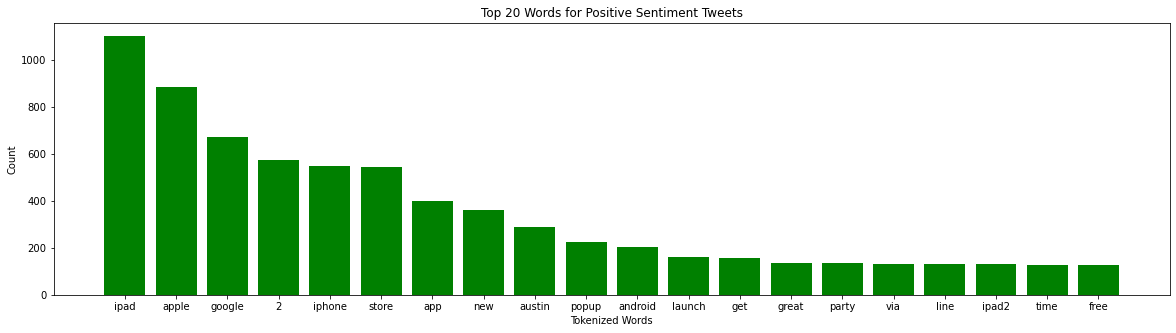

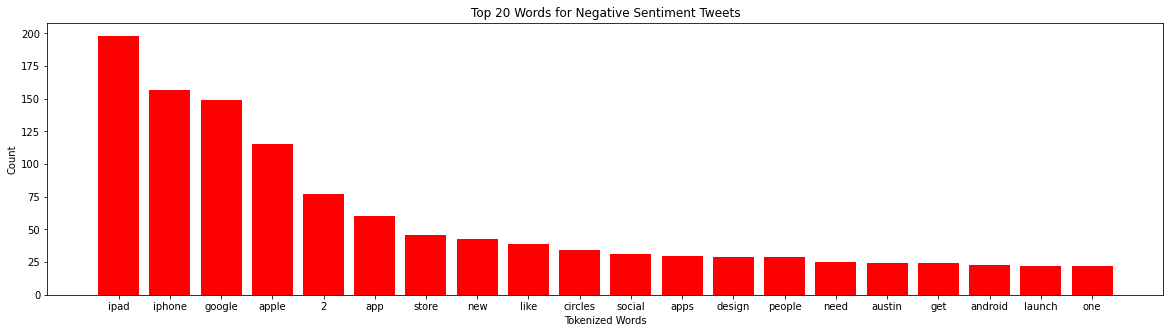

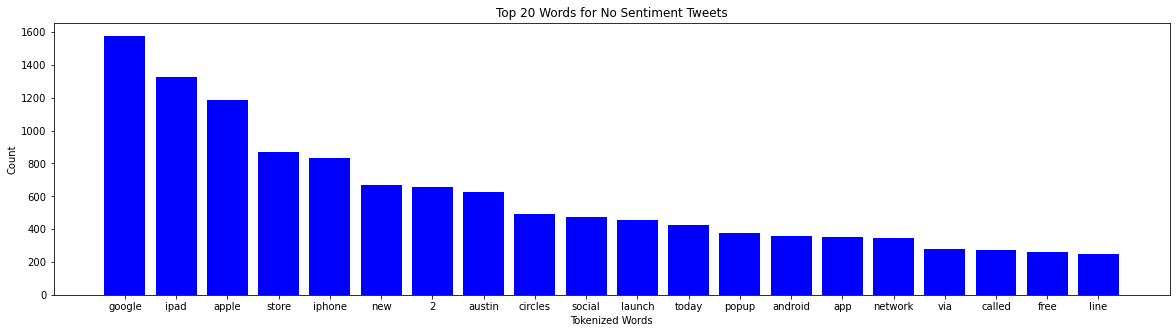

In [30]:
# Use the function we created in the previous cell to plot the frequency distributions
plot_fdist(fdist_pos20, 'Top 20 Words for Positive Sentiment Tweets', 'green')
plot_fdist(fdist_neg20, 'Top 20 Words for Negative Sentiment Tweets', 'red')
plot_fdist(fdist_none20, 'Top 20 Words for No Sentiment Tweets', 'blue')

In [31]:
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
pos_finder = BigramCollocationFinder.from_words(positive_tweets_tk_list)
score_pos = pos_finder.score_ngrams(bigram_measures.raw_freq)
score_pos[:10]

[(('ipad', '2'), 0.017203564084989718),
 (('apple', 'store'), 0.007402330363262509),
 (('iphone', 'app'), 0.0047292666209732695),
 (('popup', 'store'), 0.004420836189170664),
 (('social', 'network'), 0.0028786840301576423),
 (('google', 'maps'), 0.002775873886223441),
 (('new', 'social'), 0.002638793694311172),
 (('downtown', 'austin'), 0.002467443454420836),
 (('ipad', 'app'), 0.002433173406442769),
 (('apple', 'opening'), 0.002398903358464702)]

In [32]:
neg_finder = BigramCollocationFinder.from_words(neg_tweets_tk_list)
score_neg = neg_finder.score_ngrams(bigram_measures.raw_freq)
score_neg[:10]

[(('ipad', '2'), 0.01072478809894482),
 (('apple', 'store'), 0.0041515308770108976),
 (('iphone', 'app'), 0.0041515308770108976),
 (('ipad', 'design'), 0.0034596090641757483),
 (('design', 'headaches'), 0.002940667704549386),
 (('new', 'social'), 0.0027676872513405985),
 (('google', 'circles'), 0.002594706798131811),
 (('social', 'network'), 0.002594706798131811),
 (('company', 'america'), 0.002248745891714236),
 (('news', 'apps'), 0.002248745891714236)]

In [33]:
none_finder = BigramCollocationFinder.from_words(none_tweets_tk_list)
score_none = none_finder.score_ngrams(bigram_measures.raw_freq)
score_none[:10]

[(('ipad', '2'), 0.010760359074965817),
 (('social', 'network'), 0.006757426233081664),
 (('apple', 'store'), 0.006658343736995423),
 (('new', 'social'), 0.006182747755781464),
 (('called', 'circles'), 0.004914491805877574),
 (('network', 'called'), 0.004855042308225829),
 (('google', 'launch'), 0.004716326813705091),
 (('major', 'new'), 0.004359629827794622),
 (('launch', 'major'), 0.004201097834056635),
 (('popup', 'store'), 0.003943483344232408)]

In [34]:
score_pos10 = list(zip(*score_pos[:10]))
score_neg10 = list(zip(*score_neg[:10]))
score_none10 = list(zip(*score_none[:10]))
score_pos10_x = [str(item) for item in list(score_pos10[0])]
score_pos10_y = list(score_pos10[1])
score_neg10_x = [str(item) for item in list(score_neg10[0])]
score_neg10_y = list(score_neg10[1])
score_none10_x = [str(item) for item in list(score_none10[0])]
score_none10_y = list(score_none10[1])

In [35]:
def plot_bigram(x, y, sentiment='n/a', color='blue'):
    fig, ax = plt.subplots(figsize=(40,10))
    ax.bar(x, y, color=color)
    ax.set_xticklabels(x, fontsize=20)
    ax.set_title(f'Top 10 Two-Word Combos for {sentiment} Sentiment Tweets', fontsize=35)
    plt.show()

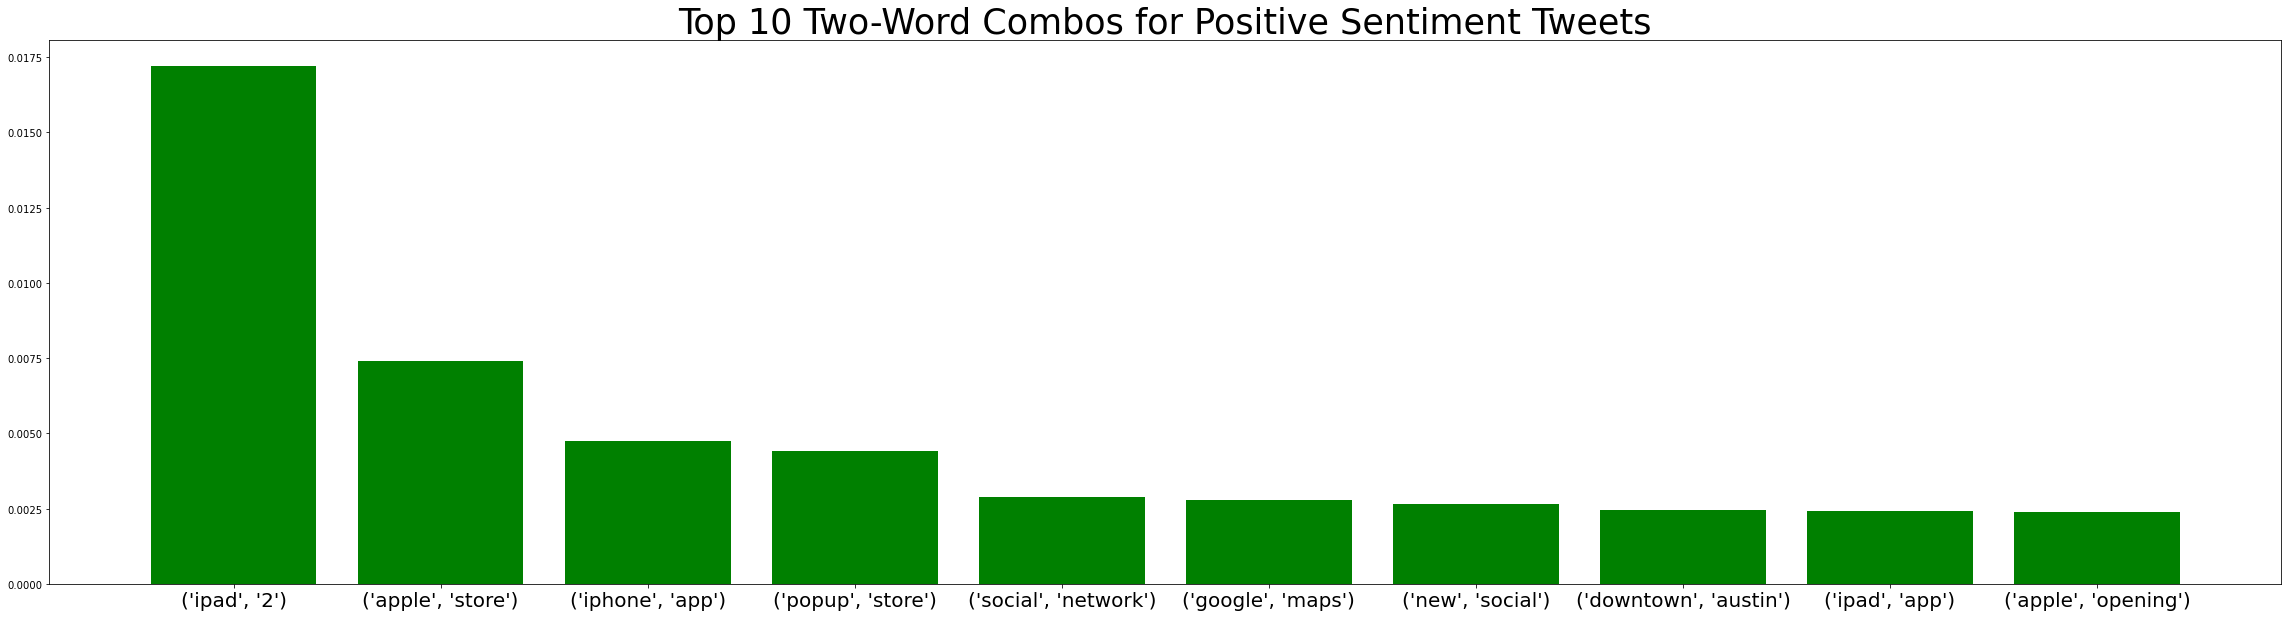

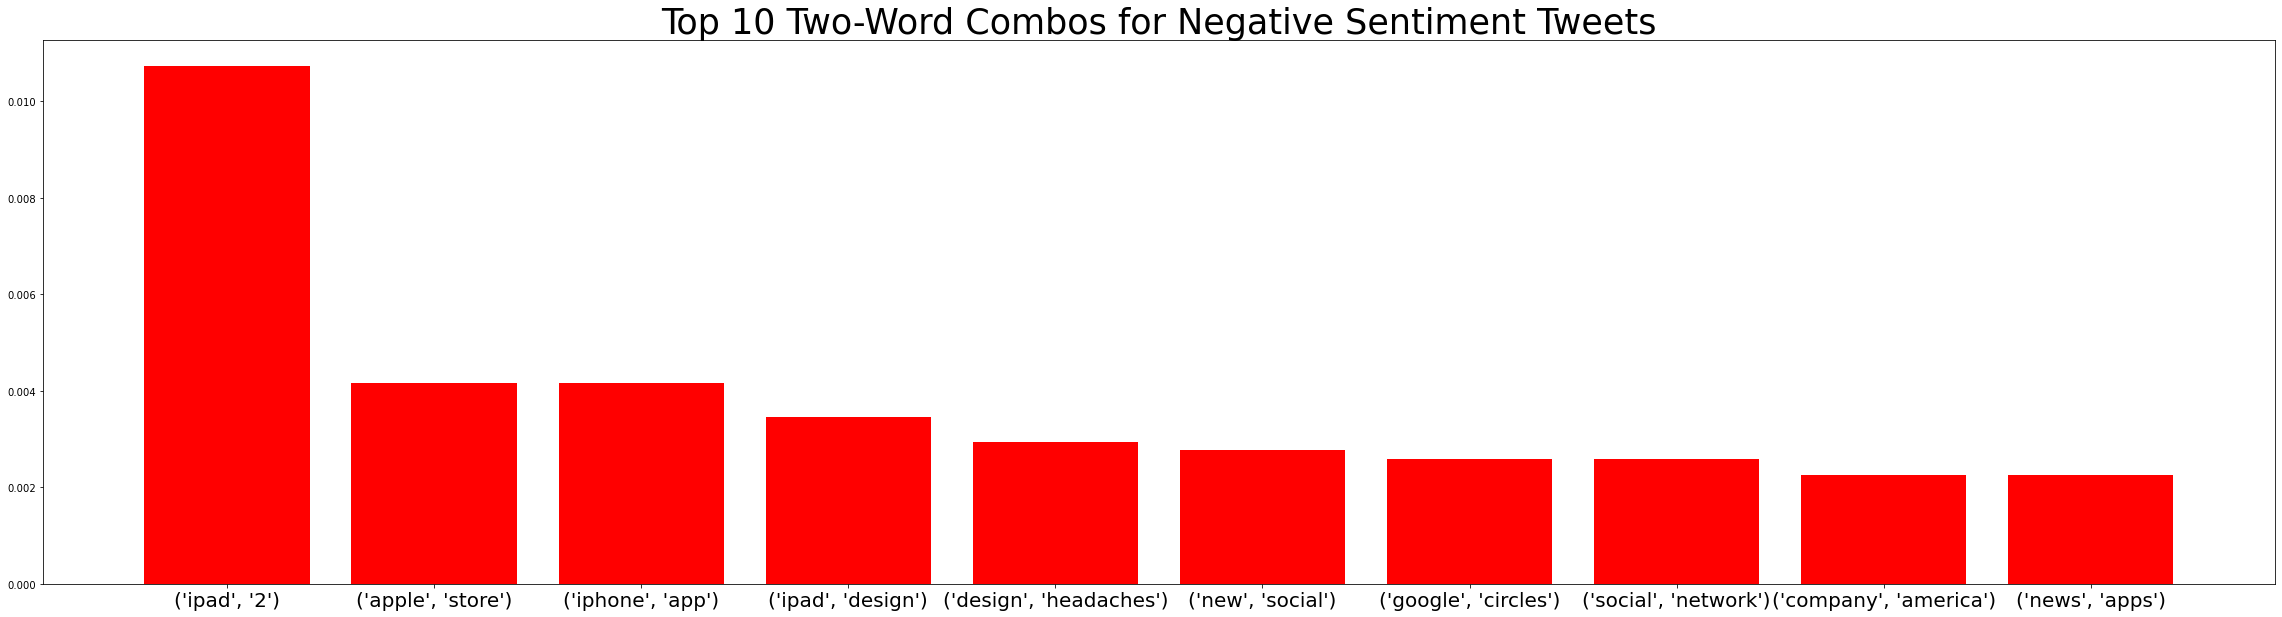

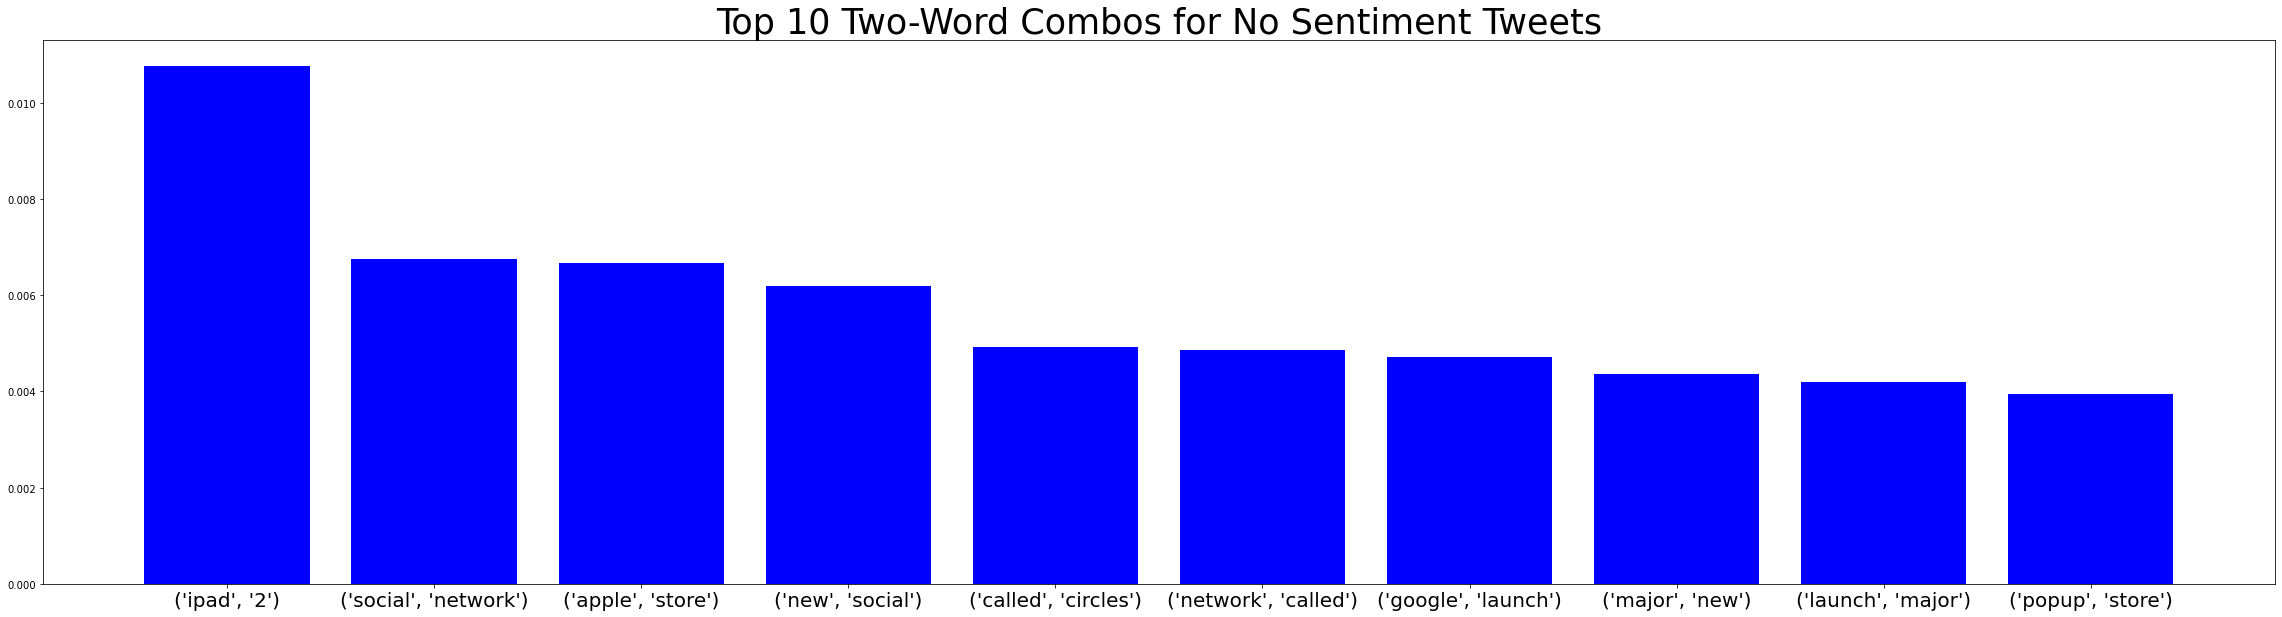

In [36]:
plot_bigram(score_pos10_x, score_pos10_y, sentiment='Positive', color='green')
plot_bigram(score_neg10_x, score_neg10_y, sentiment='Negative', color='red')
plot_bigram(score_none10_x, score_none10_y, sentiment='No', color='blue')

In [37]:
data_tokenized1["tweet_without_stopwords_and_punc"] = data_tokenized1["tweet_without_stopwords_and_punc"].apply(remove_stopwords)
google_tweets = data_tokenized1.loc[(data_tokenized1['product']=='Google') | (data_tokenized1['product']=='Other Google product or service')]
android_tweets = data_tokenized1.loc[(data_tokenized1['product']=='Android') | (data_tokenized1['product']=='Android App')]
apple_tweets = data_tokenized1.loc[(data_tokenized1['product']=='iPad') | (data_tokenized1['product']=='iPhone') | (data_tokenized1['product']=='iPad or iPhone App') | (data_tokenized1['product']=='Other Apple product or service') | (data_tokenized1['product']=='Apple')]

In [38]:
def twt_list(df, sentiment):
    company_twt = df.loc[df['sentiment']==sentiment]
    company_twt = company_twt['tweet_without_stopwords_and_punc']
    company_list = []
    for twt in company_twt:
        company_list+=twt
    return company_list

In [39]:
pos_google_twt_list = twt_list(google_tweets, 'positive')
neg_google_twt_list = twt_list(google_tweets, 'negative')
pos_android_twt_list = twt_list(android_tweets, 'positive')
neg_android_twt_list = twt_list(android_tweets, 'negative')
pos_apl_twt_list = twt_list(apple_tweets, 'positive')
neg_apl_twt_list = twt_list(apple_tweets, 'negative')

In [40]:
from wordcloud import WordCloud
def wordcloud(tokens, background_color='black', text_color='Blues', title=''):
    wordcloud = WordCloud(background_color=background_color, 
                          colormap=text_color, 
                          width=500, height=300)
    wordcloud.generate(','.join(tokens))
    plt.figure(figsize=(10,8))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()

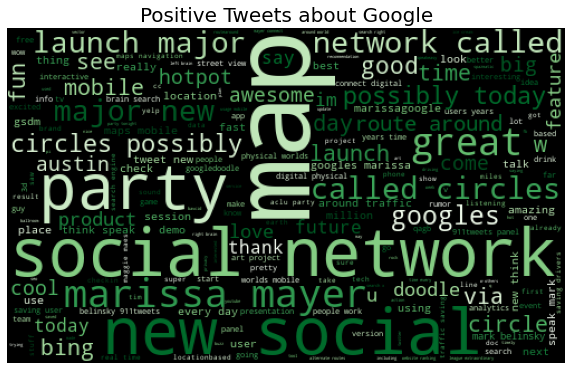

In [41]:
pos_google_wordcloud_list = [item for item in pos_google_twt_list if item!='google']
wordcloud(pos_google_wordcloud_list, text_color='Greens', title="Positive Tweets about Google")

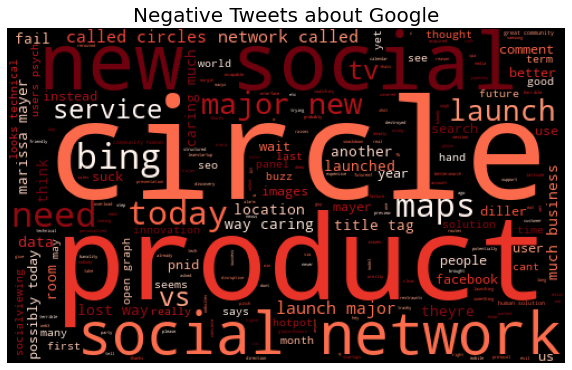

In [42]:
neg_google_wordcloud_list = [item for item in neg_google_twt_list if item!='google']
wordcloud(neg_google_wordcloud_list, text_color='Reds', title='Negative Tweets about Google')

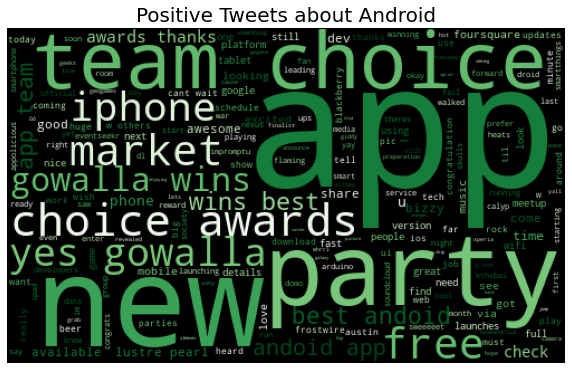

In [43]:
pos_android_wordcloud_list = [item for item in pos_android_twt_list if item!='android']
wordcloud(pos_android_wordcloud_list, text_color='Greens', title='Positive Tweets about Android')

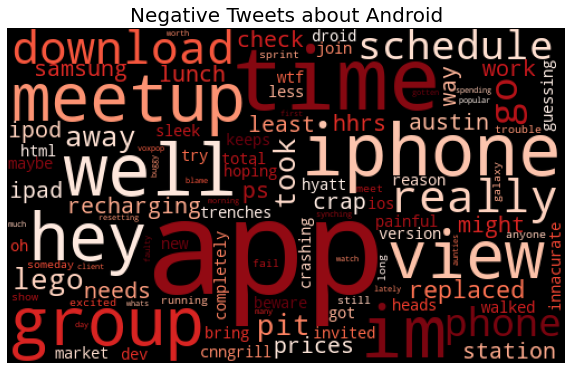

In [44]:
neg_android_wordcloud_list = [item for item in neg_android_twt_list if item!='android']
wordcloud(neg_android_wordcloud_list, text_color='Reds', title='Negative Tweets about Android')

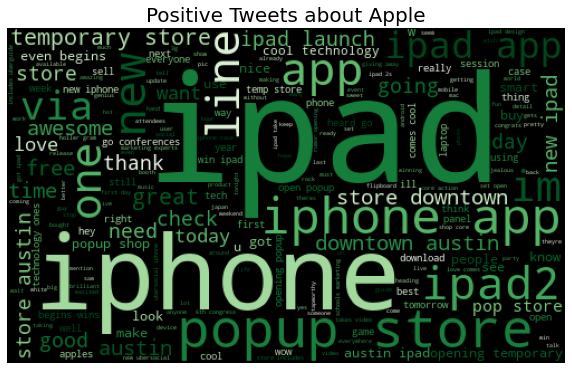

In [45]:
pos_apl_wordcloud_list = [item for item in pos_apl_twt_list if item!='apple']
wordcloud(pos_apl_wordcloud_list, text_color='Greens', title='Positive Tweets about Apple')

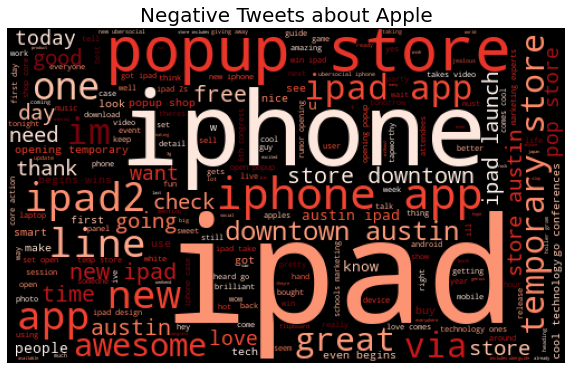

In [46]:
neg_apl_wordcloud_list = [item for item in pos_apl_twt_list if item!='apple']
wordcloud(neg_apl_wordcloud_list, text_color='Reds', title='Negative Tweets about Apple')

In [47]:
def score_bigram(token_list):
    bigram_measures = nltk.collocations.BigramAssocMeasures()
    finder = BigramCollocationFinder.from_words(token_list)
    score = finder.score_ngrams(bigram_measures.raw_freq)
    score_10 = list(zip(*score[:10]))
    return score_10

In [48]:
google_score_pos = score_bigram(pos_google_twt_list)
google_score_neg = score_bigram(neg_google_twt_list)
android_score_pos = score_bigram(pos_android_twt_list)
android_score_neg = score_bigram(neg_android_twt_list)
apl_score_pos = score_bigram(pos_apl_twt_list)
apl_score_neg = score_bigram(neg_apl_twt_list)

In [49]:
def plot_bigram_company(tokens, company = '', sentiment='n/a', color='blue'):
    fig, ax = plt.subplots(figsize=(45,10))
    x = [str(item) for item in list(tokens[0])]
    y = list(tokens[1])
    ax.bar(x, y, color=color)
    ax.set_xticklabels(x, fontsize=20)
    ax.set_title(f'Top 10 Two-Word Combos for {sentiment} Sentiment Tweets about {company}', fontsize=35)
    plt.show()

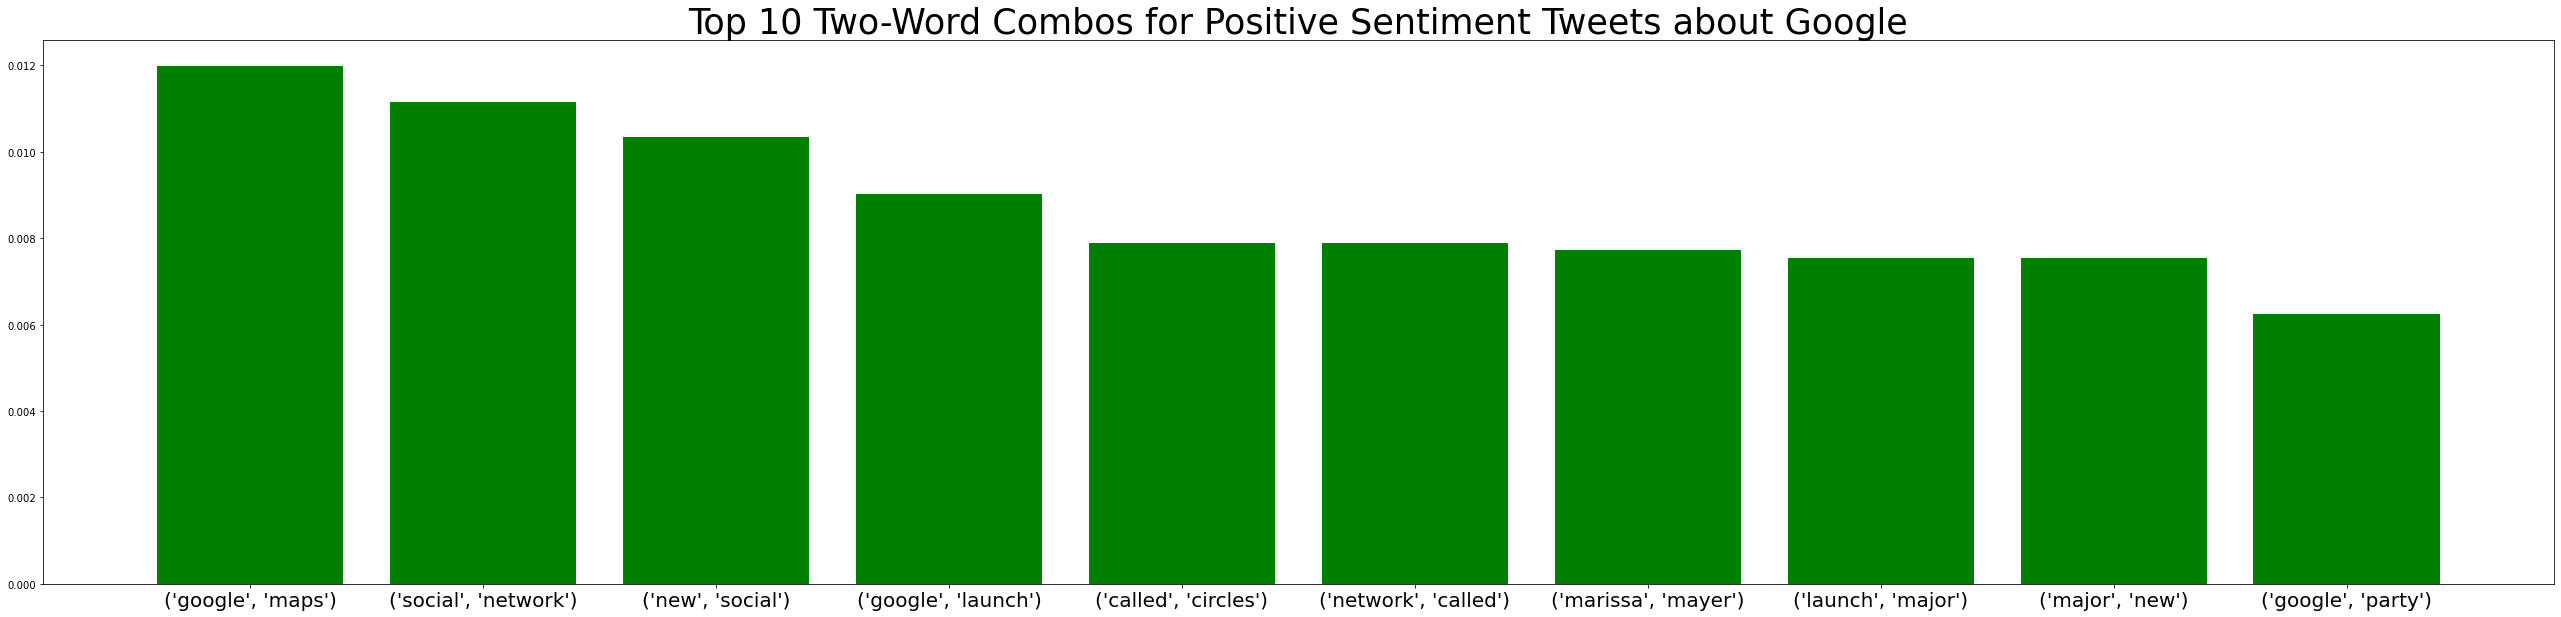

In [50]:
plot_bigram_company(google_score_pos, company='Google', sentiment='Positive', color='green')

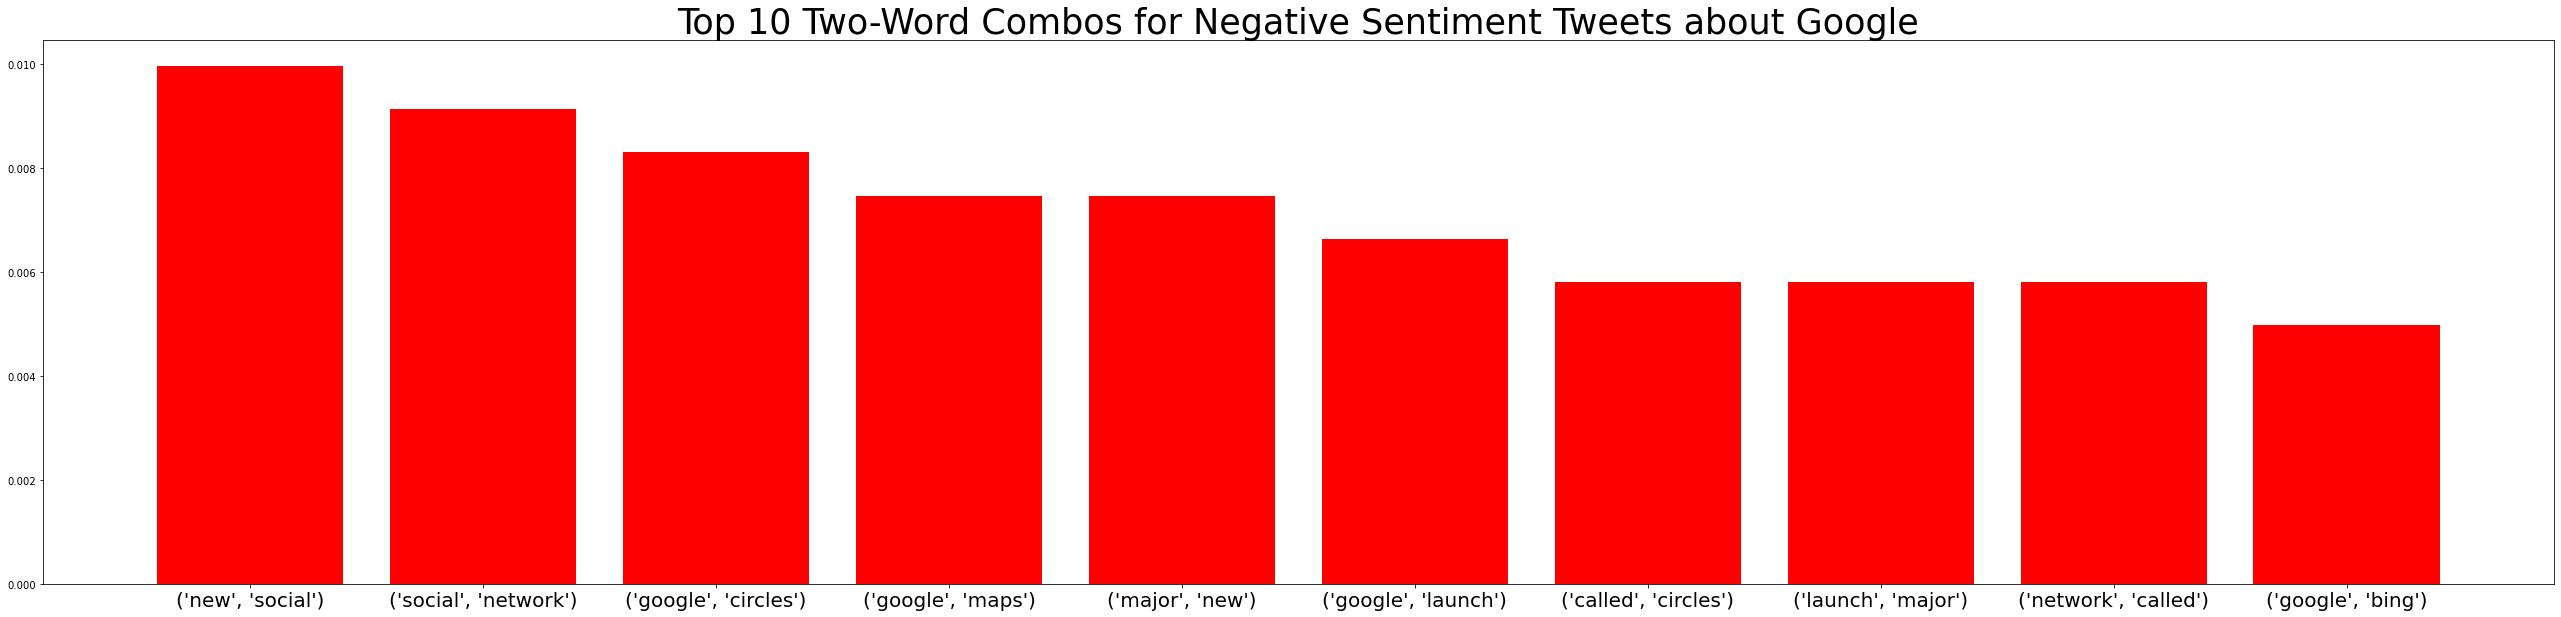

In [51]:
plot_bigram_company(google_score_neg, company='Google', sentiment='Negative', color='red')

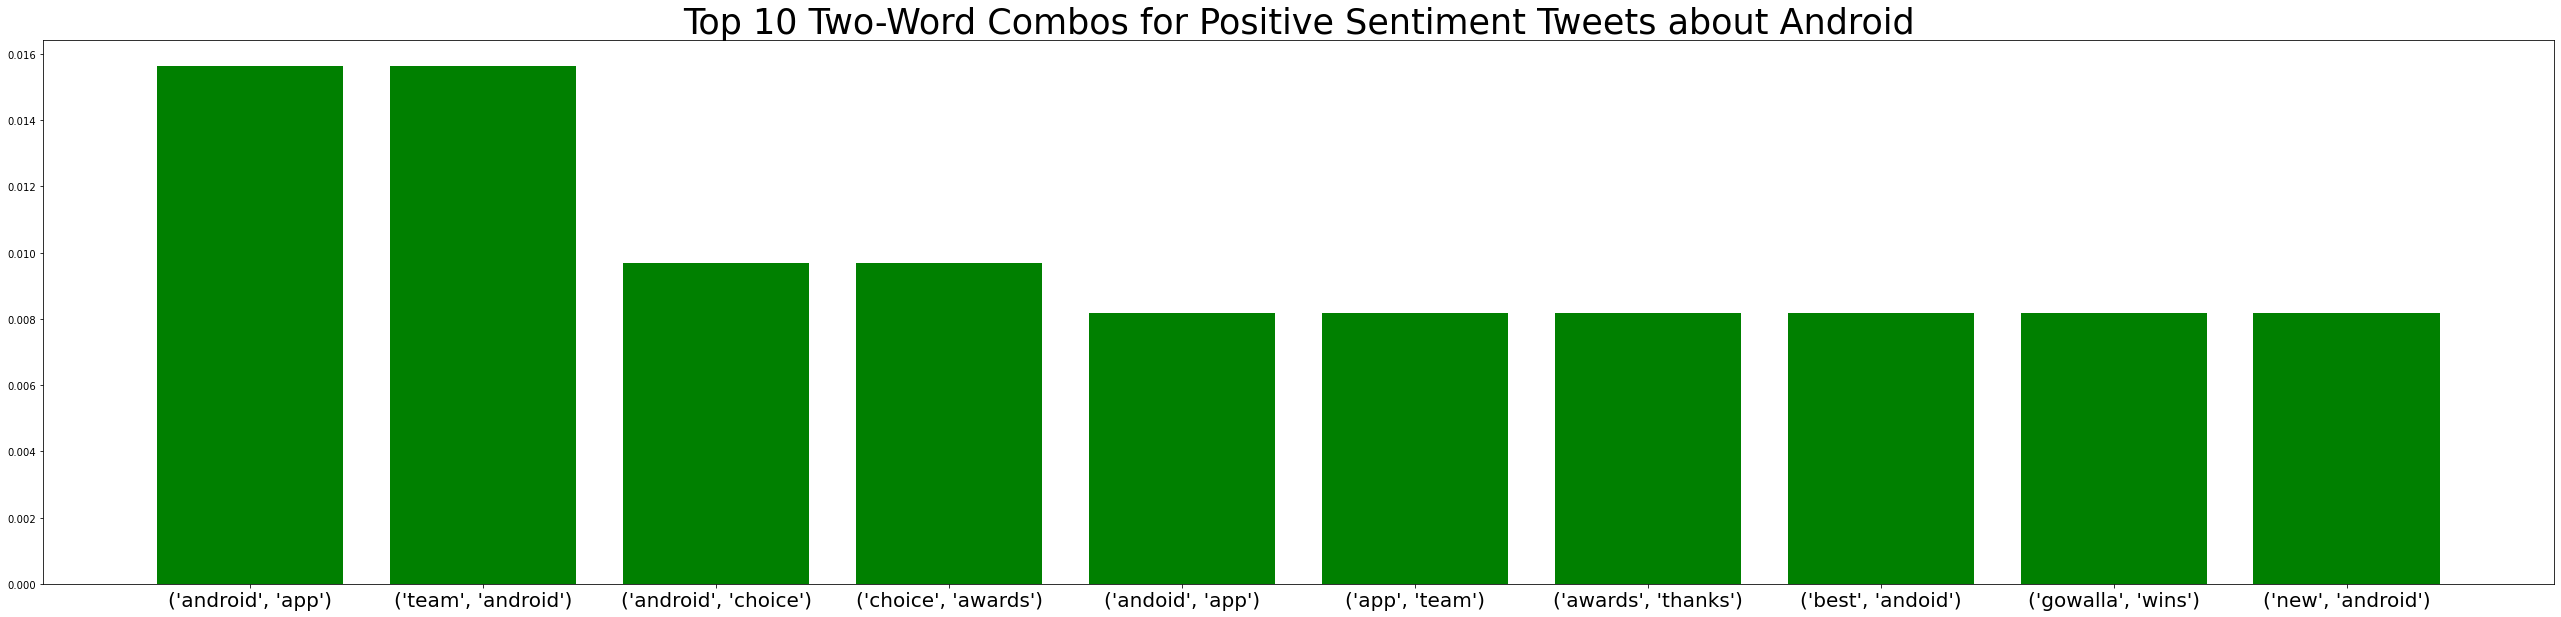

In [52]:
plot_bigram_company(android_score_pos, company='Android', sentiment='Positive', color='green')

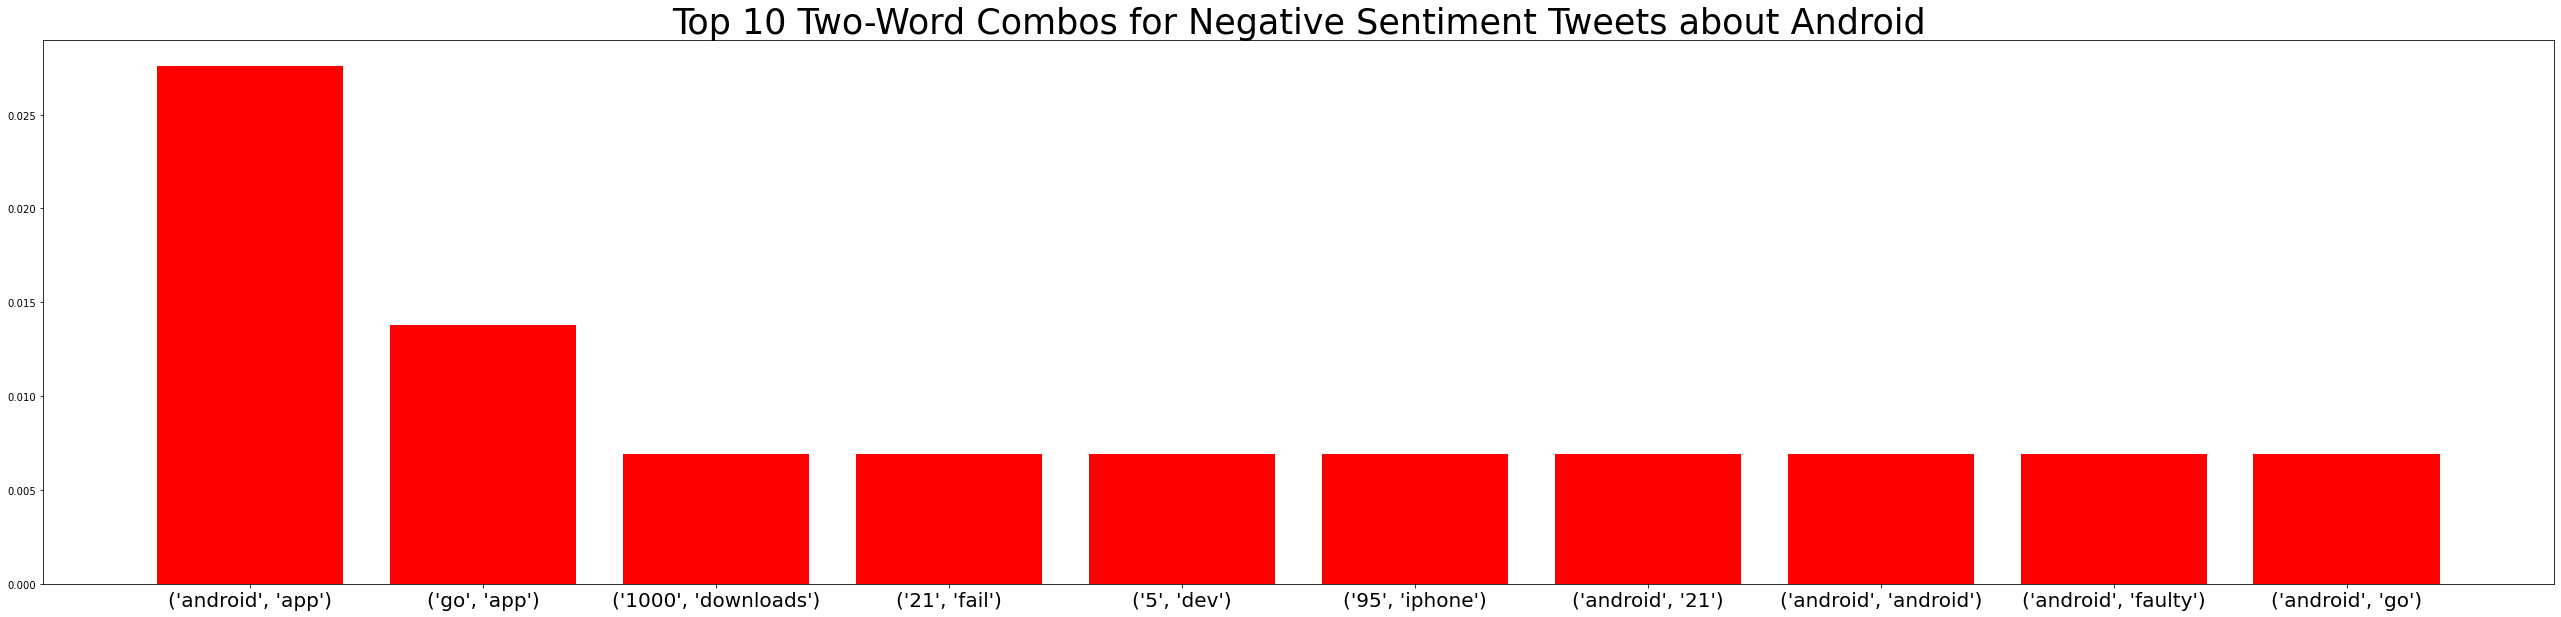

In [53]:
plot_bigram_company(android_score_neg, company='Android', sentiment='Negative', color='red')

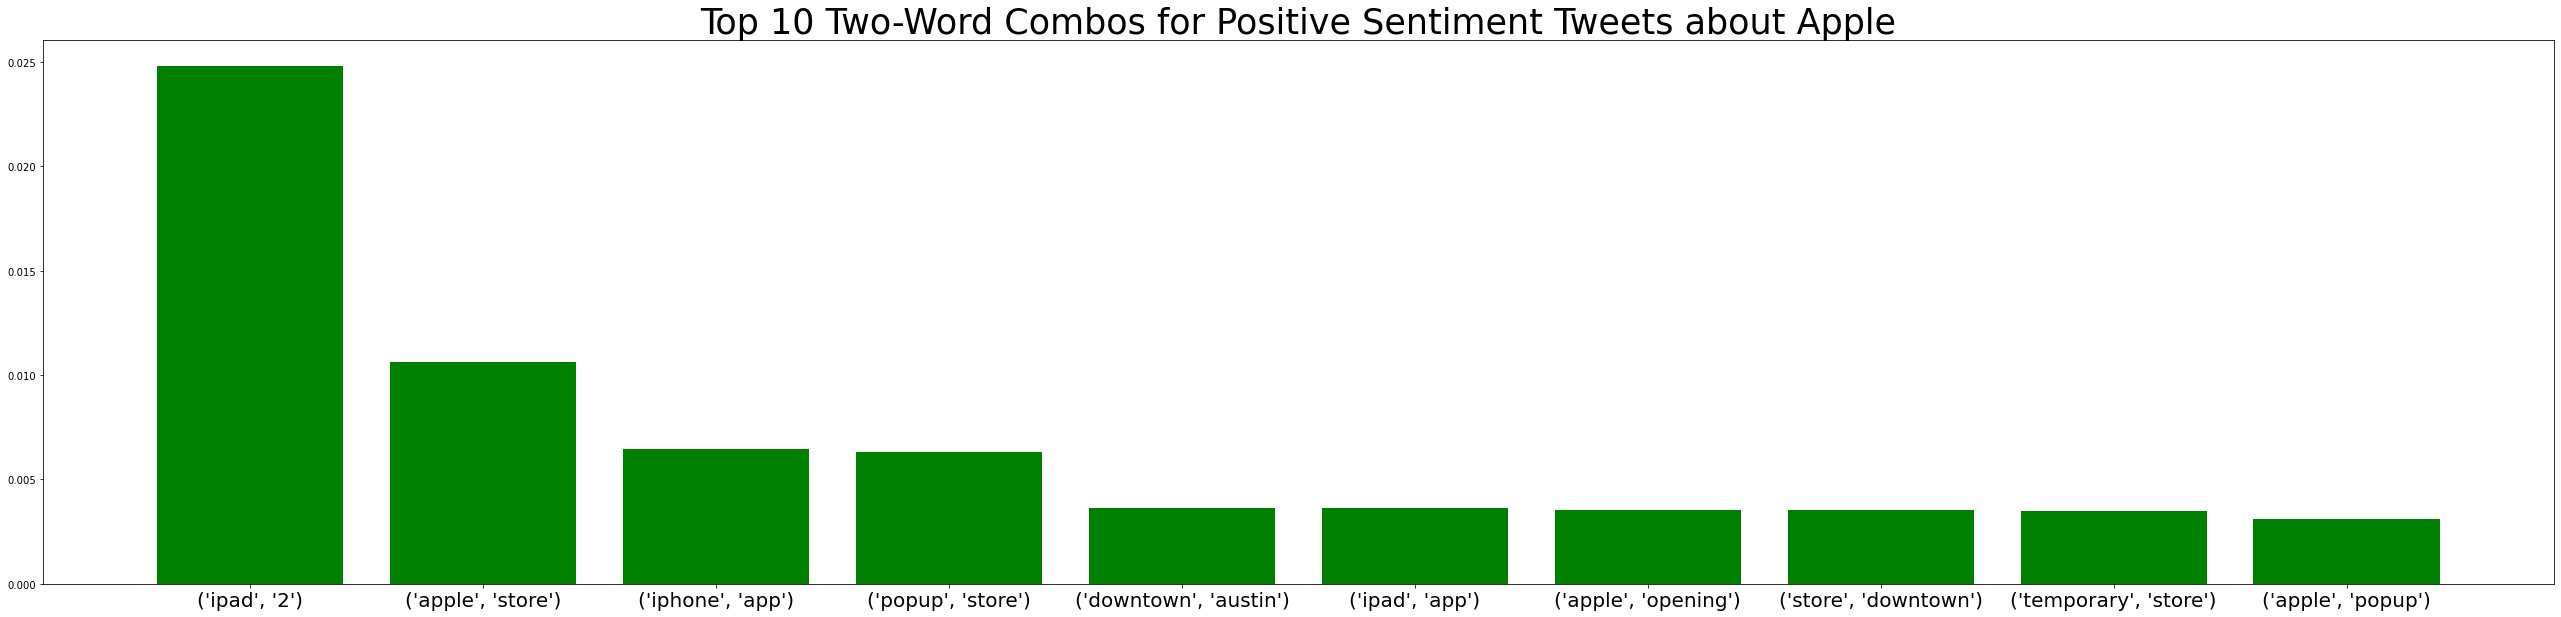

In [54]:
plot_bigram_company(apl_score_pos, company='Apple', sentiment='Positive', color='green')

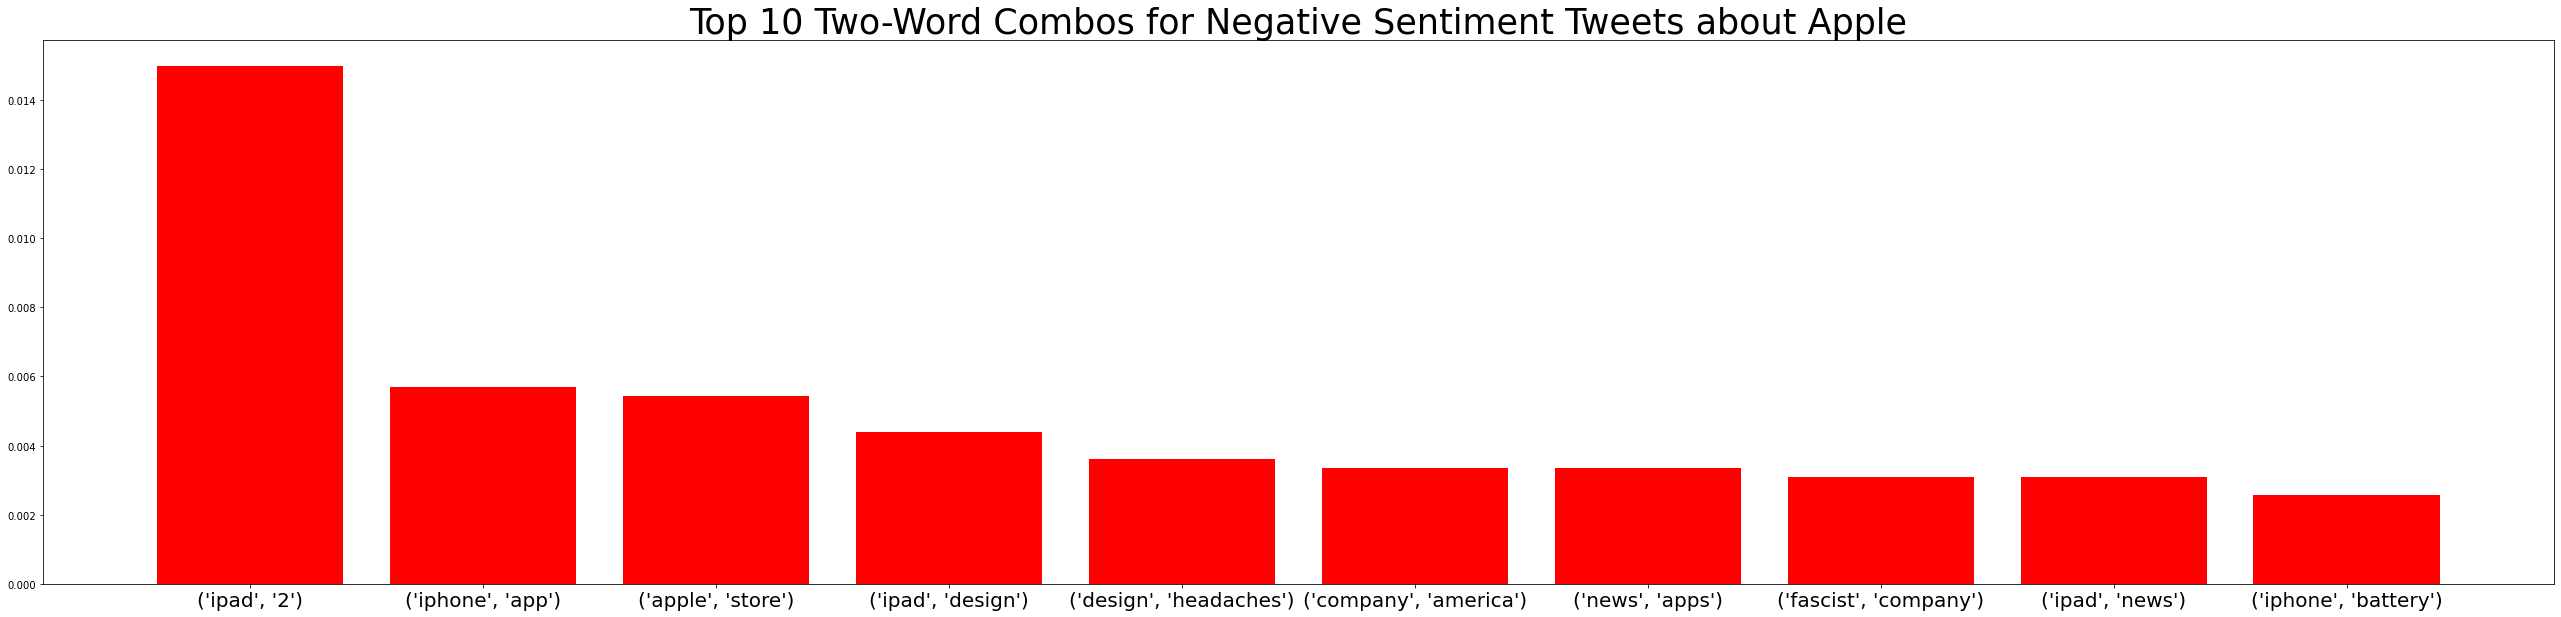

In [55]:
plot_bigram_company(apl_score_neg, company='Apple', sentiment='Negative', color='red')

In [56]:
import numpy as np
def sentiment_piechart(company_twt, title=''):
    y = []
    df = pd.DataFrame(company_twt['sentiment'].value_counts())
    labels = list(df.index)
    for item in company_twt['sentiment'].value_counts().values:
        np.float(item)
        y.append(item)
    plt.figure(figsize=(15,5))
    plt.pie(y, labels=labels, colors=['green', 'red', 'lightblue'], autopct='%1.1f%%')
    plt.title(title, fontsize=15)
    plt.show()

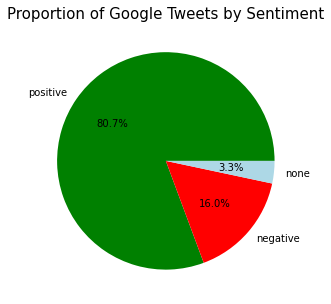

In [57]:
sentiment_piechart(google_tweets, title='Proportion of Google Tweets by Sentiment')

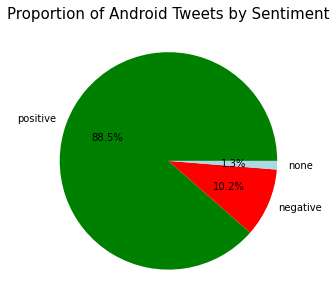

In [58]:
sentiment_piechart(android_tweets, title='Proportion of Android Tweets by Sentiment')

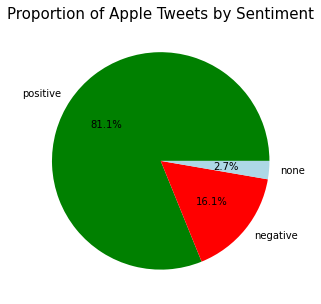

In [59]:
sentiment_piechart(apple_tweets, title='Proportion of Apple Tweets by Sentiment')

In [60]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, plot_confusion_matrix, ConfusionMatrixDisplay
from imblearn.pipeline import Pipeline

In [61]:
model_df = data.loc[data['sentiment']!='none']
sentiment_dict = {'positive': 1, 'negative': 0}
model_df['sentiment'] = model_df['sentiment'].map(sentiment_dict)
X = model_df['tweet']
y = model_df['sentiment']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

              precision    recall  f1-score   support

           0       1.00      0.03      0.05       159
           1       0.85      1.00      0.92       903

    accuracy                           0.85      1062
   macro avg       0.93      0.51      0.49      1062
weighted avg       0.88      0.85      0.79      1062



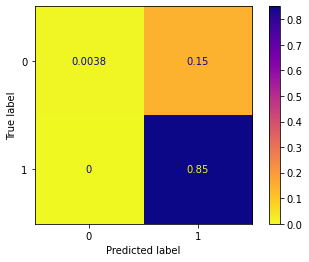

In [63]:
clf_pipe = Pipeline([('vect', TfidfVectorizer()), ('mnb_baseline', MultinomialNB())])
clf_pipe.fit(X_train, y_train)
y_pred = clf_pipe.predict(X_test)
plot_confusion_matrix(clf_pipe, X_test, y_test, cmap=plt.cm.plasma_r, normalize='all')
print(classification_report(y_test, y_pred))

In [64]:
y_train.value_counts(normalize=True)

1    0.834477
0    0.165523
Name: sentiment, dtype: float64

              precision    recall  f1-score   support

           0       1.00      0.06      0.12       159
           1       0.86      1.00      0.92       903

    accuracy                           0.86      1062
   macro avg       0.93      0.53      0.52      1062
weighted avg       0.88      0.86      0.80      1062



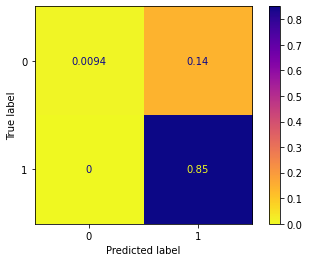

In [65]:
clf_pipe_tk_stop = Pipeline([('vect', TfidfVectorizer(tokenizer = tk.tokenize, stop_words=stopwords_list)),
                     ('mnb_baseline', MultinomialNB())])
clf_pipe_tk_stop.fit(X_train, y_train)
y_pred = clf_pipe_tk_stop.predict(X_test)
plot_confusion_matrix(clf_pipe_tk_stop, X_test, y_test, cmap=plt.cm.plasma_r, normalize='all')
print(classification_report(y_test, y_pred))

In [66]:
param_grid = {'vect__ngram_range': [(1,1), (1,2), (1,3)],
              'mnb_baseline__alpha': [0.00001, 0.0001, 0.001, 0.1, 1]}
gs = GridSearchCV(estimator = clf_pipe_tk_stop, param_grid = param_grid, scoring = 'accuracy')
gs.fit(X_train, y_train)
gs.best_params_

{'mnb_baseline__alpha': 0.1, 'vect__ngram_range': (1, 3)}

              precision    recall  f1-score   support

           0       0.85      0.29      0.43       159
           1       0.89      0.99      0.94       903

    accuracy                           0.89      1062
   macro avg       0.87      0.64      0.68      1062
weighted avg       0.88      0.89      0.86      1062



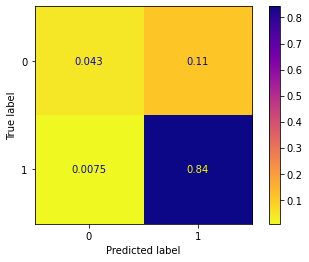

In [67]:
clf_pipe_tuned_mnb = Pipeline([('vect', TfidfVectorizer(tokenizer = tk.tokenize, 
                                                        stop_words = stopwords_list,
                                                        ngram_range = (1,3))),
                                ('mnb_baseline', MultinomialNB(alpha = 0.1))])
clf_pipe_tuned_mnb.fit(X_train, y_train)
y_pred = clf_pipe_tuned_mnb.predict(X_test)
plot_confusion_matrix(clf_pipe_tuned_mnb, X_test, y_test, cmap=plt.cm.plasma_r, normalize='all')
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.53      0.53       159
           1       0.92      0.92      0.92       903

    accuracy                           0.86      1062
   macro avg       0.73      0.72      0.73      1062
weighted avg       0.86      0.86      0.86      1062



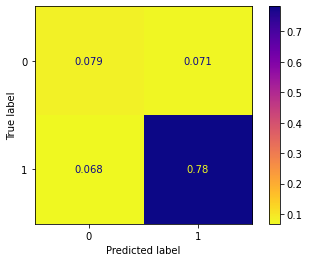

In [68]:
from imblearn.over_sampling import RandomOverSampler
clf_pipe_tuned_mnb_os = Pipeline([('vect', TfidfVectorizer(tokenizer = tk.tokenize, 
                                                        stop_words = stopwords_list,
                                                        ngram_range = (1,3))),
                                  ('os', RandomOverSampler(random_state = 42)),
                                  ('mnb_baseline', MultinomialNB(alpha = 0.1))])
clf_pipe_tuned_mnb_os.fit(X_train, y_train)
y_pred = clf_pipe_tuned_mnb_os.predict(X_test)
plot_confusion_matrix(clf_pipe_tuned_mnb_os, X_test, y_test, cmap=plt.cm.plasma_r, normalize='all')
print(classification_report(y_test, y_pred))

In [69]:
multi_model_df = data.copy()
sentiment_dict_multi = {'negative': 0, 'positive': 1, 'none': 2}
multi_model_df['sentiment'] = multi_model_df['sentiment'].map(sentiment_dict_multi)
X = multi_model_df['tweet']
y = multi_model_df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

              precision    recall  f1-score   support

           0       1.00      0.01      0.02       190
           1       0.74      0.18      0.29       889
           2       0.63      0.97      0.76      1596

    accuracy                           0.64      2675
   macro avg       0.79      0.39      0.36      2675
weighted avg       0.69      0.64      0.56      2675



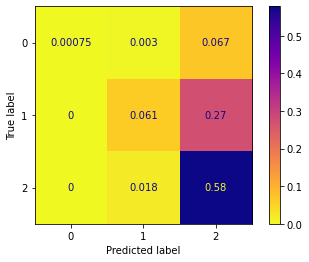

In [70]:
clf_pipe = Pipeline([('vect', TfidfVectorizer()),
                    ('mnb_multi_baseline', MultinomialNB())])
clf_pipe.fit(X_train, y_train)
y_pred = clf_pipe.predict(X_test)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(clf_pipe, X_test, y_test, cmap=plt.cm.plasma_r, normalize='all')

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       190
           1       0.71      0.22      0.34       889
           2       0.64      0.96      0.77      1596

    accuracy                           0.65      2675
   macro avg       0.45      0.39      0.37      2675
weighted avg       0.62      0.65      0.57      2675



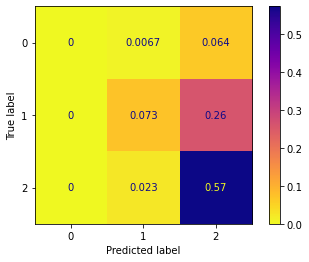

In [71]:
clf_pipe_tk_stop = Pipeline([('vect', TfidfVectorizer(tokenizer = tk.tokenize, stop_words = stopwords_list)),
                            ('mnb_multi_baseline', MultinomialNB())])
clf_pipe_tk_stop.fit(X_train, y_train)
y_pred = clf_pipe_tk_stop.predict(X_test)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(clf_pipe_tk_stop, X_test, y_test, cmap=plt.cm.plasma_r, normalize='all')

In [72]:
param_grid = {'vect__ngram_range': [(1,1), (1,2), (1,3)],
              'mnb_multi_baseline__alpha': [0.00001, 0.0001, 0.001, 0.1, 1]}
gs = GridSearchCV(estimator = clf_pipe_tk_stop, param_grid = param_grid, scoring = 'recall_macro')
gs.fit(X_train, y_train)
gs.best_params_

{'mnb_multi_baseline__alpha': 0.001, 'vect__ngram_range': (1, 3)}

              precision    recall  f1-score   support

           0       0.53      0.29      0.37       190
           1       0.57      0.57      0.57       889
           2       0.72      0.76      0.74      1596

    accuracy                           0.67      2675
   macro avg       0.61      0.54      0.56      2675
weighted avg       0.66      0.67      0.66      2675



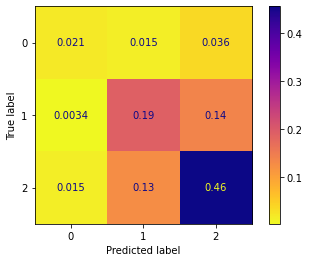

In [73]:
clf_pipe_tuned_multi = Pipeline([('vect', TfidfVectorizer(tokenizer = tk.tokenize, stop_words = stopwords_list
                                                         , ngram_range = (1,3))),
                            ('mnb_multi_baseline', MultinomialNB(alpha = 0.001))])
clf_pipe_tuned_multi.fit(X_train, y_train)
y_pred = clf_pipe_tuned_multi.predict(X_test)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(clf_pipe_tuned_multi, X_test, y_test, cmap=plt.cm.plasma_r, normalize='all')

              precision    recall  f1-score   support

           0       0.48      0.30      0.37       190
           1       0.56      0.58      0.57       889
           2       0.73      0.74      0.73      1596

    accuracy                           0.66      2675
   macro avg       0.59      0.54      0.56      2675
weighted avg       0.65      0.66      0.65      2675



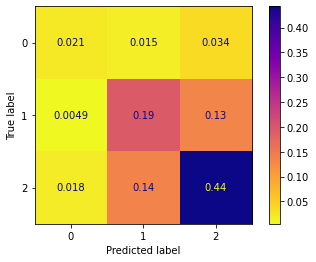

In [74]:
clf_pipe_tuned_multi_os = Pipeline([('vect', TfidfVectorizer(tokenizer = tk.tokenize, stop_words = stopwords_list
                                                         , ngram_range = (1,3))),
                                    ('os', RandomOverSampler(random_state = 42)),
                            ('mnb_multi_baseline', MultinomialNB(alpha = 0.001))])
clf_pipe_tuned_multi_os.fit(X_train, y_train)
y_pred = clf_pipe_tuned_multi_os.predict(X_test)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(clf_pipe_tuned_multi_os, X_test, y_test, cmap=plt.cm.plasma_r, normalize='all')